In [11]:
# Define the path to your COCO dataset annotations and images
data_dir = 'C:\\Users\\ICMR-MIT\\Downloads\\icmr_project\\data'
datasets = ['dataset_1.json', 'dataset_2.json', 'dataset_3.json', 'dataset_4.json', 'dataset_5.json']
image_dir = 'images'  # Modify this according to your datasett

In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

loading annotations into memory...
Done (t=0.10s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


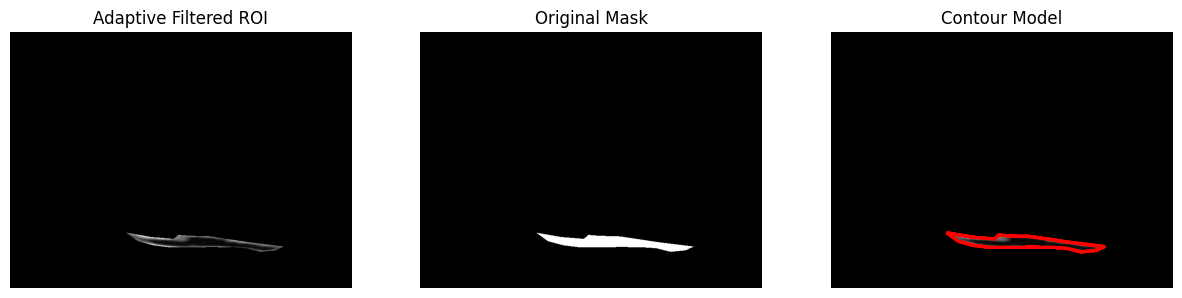

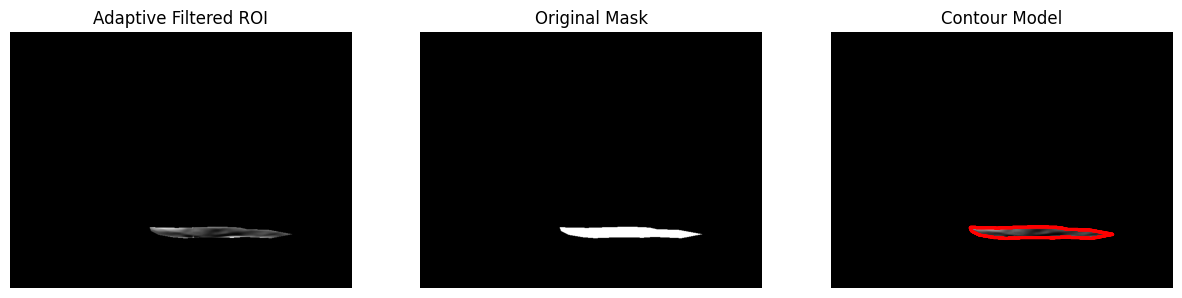

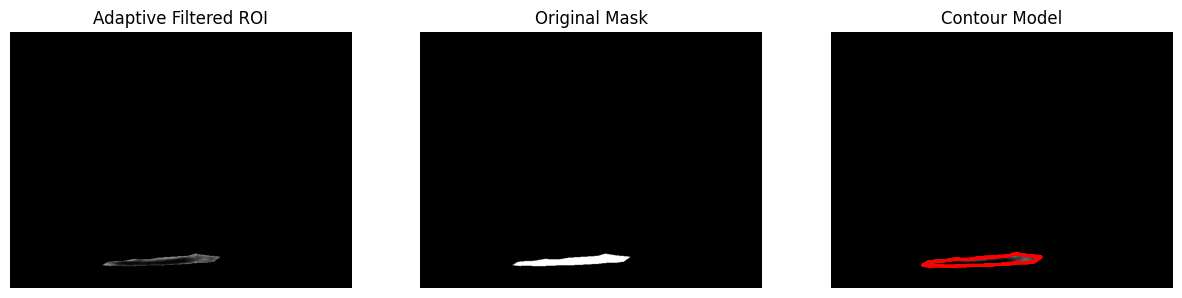

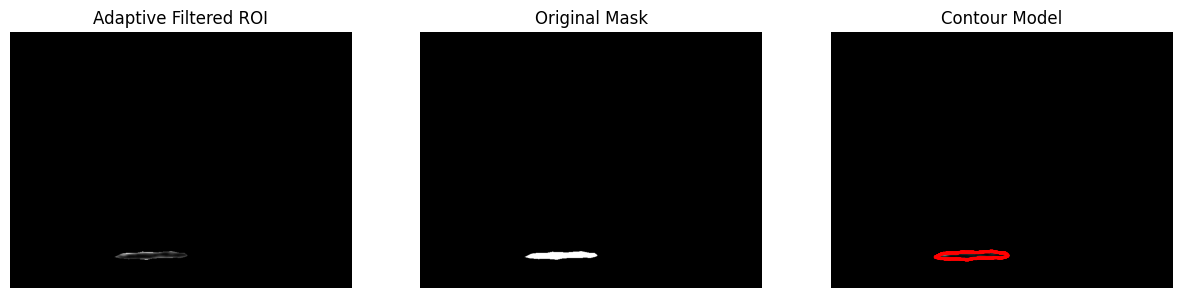

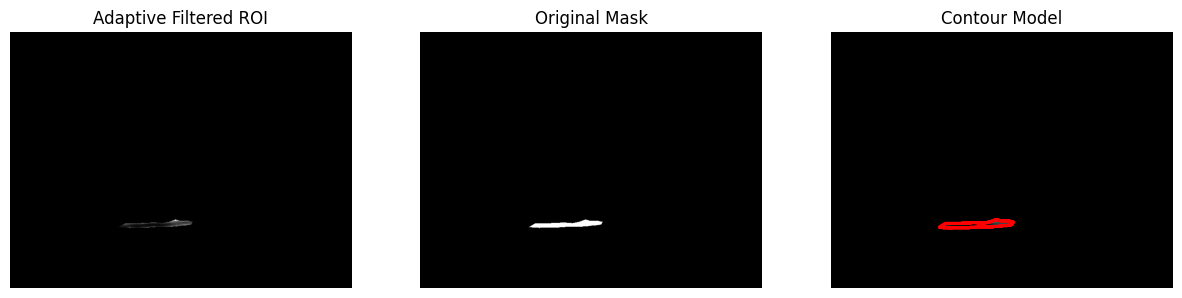

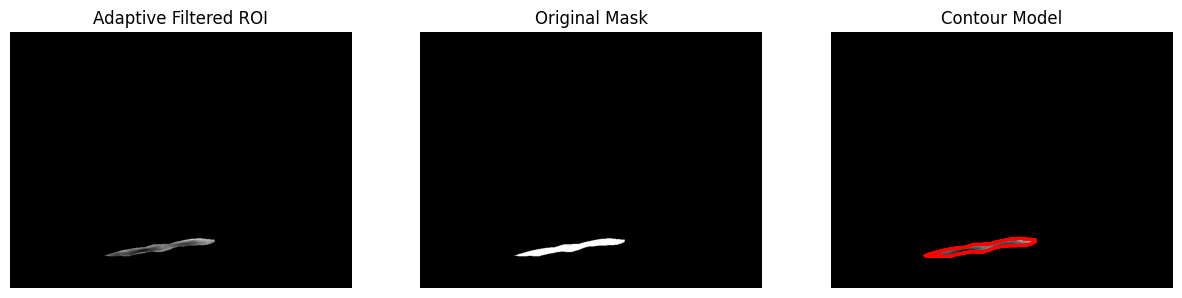

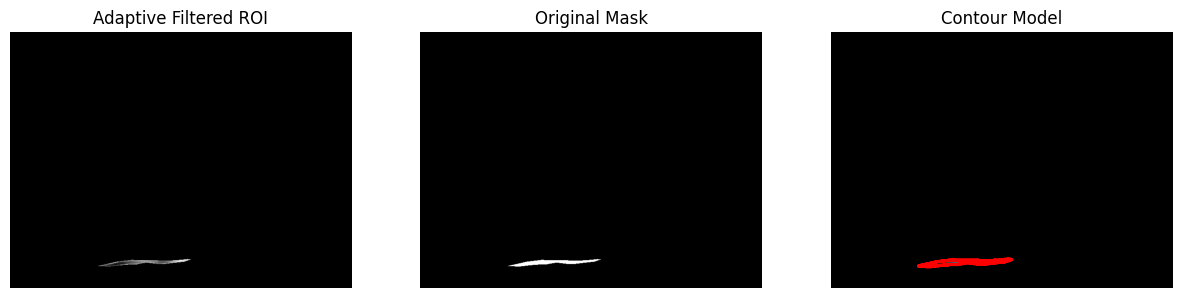

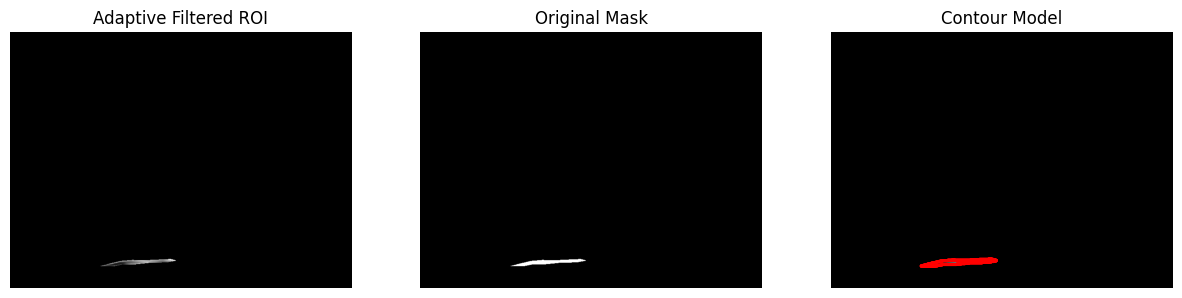

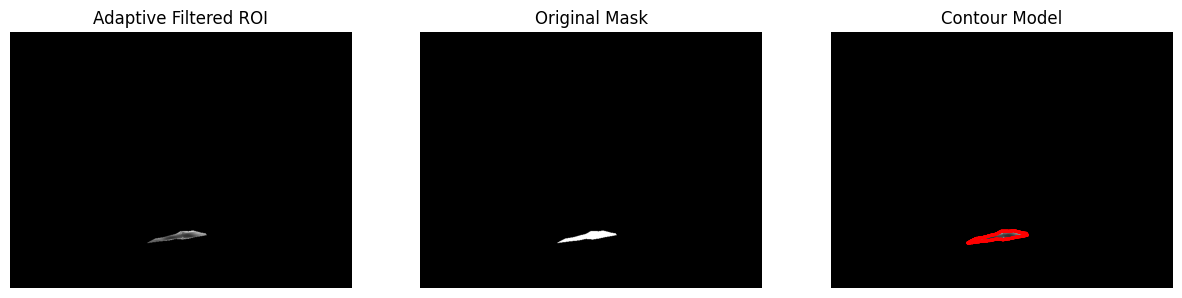

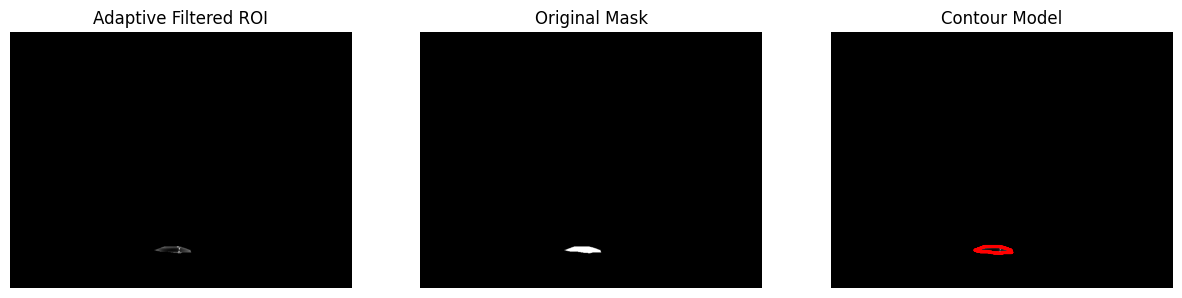

In [13]:


def DataLoader(dataset_list):
    image_list, mask_list = [], []

    # Created CLAHE object for adaptive histogram equalization
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    for dataset in dataset_list:
        # Load the COCO dataset
        coco_api = COCO(os.path.join(data_dir, dataset))

        # Get the image IDs
        image_ids = coco_api.getImgIds()

        for image_id in image_ids:
            # Get the image info
            image_info = coco_api.loadImgs(image_id)[0]

            # Load the image
            image = cv2.imread(os.path.join(data_dir, os.path.join(image_dir, image_info['file_name'])))

            # Get the annotations for the image
            ann_ids = coco_api.getAnnIds(imgIds=image_id)
            anns = coco_api.loadAnns(ann_ids)

            # Create a mask combining all annotations
            mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
            for ann in anns:
                mask += coco_api.annToMask(ann)

            # Applied adaptive filtering
            image_filtered = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

            # Applied ROI selection using the mask
            roi_image = cv2.bitwise_and(image_filtered, image_filtered, mask=mask)

            # Applied histogram equalization to the ROI
            roi_gray = cv2.cvtColor(roi_image, cv2.COLOR_BGR2GRAY)
            roi_equalized = cv2.equalizeHist(roi_gray)

            # Applied adaptive histogram equalization to the ROI
            roi_adaptive = clahe.apply(roi_gray)

            # Image segmentation using contour models
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

            image_list.append(roi_adaptive)  
            mask_list.append(mask)

    return image_list, mask_list

images, masks = DataLoader(datasets)


for i in range(10):
    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.imshow(images[i], cmap='gray')
    plt.title('Adaptive Filtered ROI')
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(masks[i], cmap='gray')
    plt.title('Original Mask')
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(images[i], cmap='gray')
    plt.contour(masks[i], colors='r', linewidths=2)
    plt.title('Contour Model')
    plt.axis('off')

    plt.show()
